In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
#import tensorflow as tf
import numpy as np
import os

import pandas as pd
import PIL
from PIL import Image as im

#print(tf.__version__)

from matplotlib import image

In [2]:
HOME_DIR = '/Users/lucianoaraujo/Desktop/'
DATA_DIR = 'LifeCLEF2015Plant'

LIST_OF_TRAINING_IMAGES = 'training_dataset_info.csv'

In [3]:
training_images = pd.read_csv(LIST_OF_TRAINING_IMAGES)

In [12]:
training_images

Unnamed: 0  Filename   Content            Family         Genus  \
0               0     46826    Flower   Caryophyllaceae      Myosoton   
1               1      5848    Flower          Linaceae         Linum   
2               2     78710    Entire    Plantaginaceae    Globularia   
3               3     31476  LeafScan        Betulaceae      Carpinus   
4               4     68503    Flower       Orchidaceae        Ophrys   
5               5     21665     Fruit     Ranunculaceae       Anemone   
6               6     59906      Leaf          Fagaceae       Quercus   
7               7    104485  LeafScan          Fagaceae       Quercus   
8               8     71052    Entire           Poaceae     Ammophila   
9               9      5690    Flower        Asteraceae         Inula   
10             10     37007    Flower    Convolvulaceae   Convolvulus   
11             11     38334      Leaf        Salicaceae       Populus   
12             12     94960  LeafScan          Fabaceae       Robinia   
13             13     51382  LeafScan       Platanaceae      Platanus   
14             14     27214    Entire          Pinaceae         Pinus   
15             15    105943    Flower          Fagaceae       Quercus   
16             16     41191    Flower         Lamiaceae        Lamium   
17             17     30768  LeafScan       Sapindaceae          Acer   
18             18     75234      Stem      Celastraceae      Euonymus   
19             19       162    Entire         Lamiaceae   Clinopodium   
20             20     33261    Flower  Scrophulariaceae     Verbascum   
21             21     62748    Entire    Plumbaginaceae       Armeria   
22             22     23072      Leaf          Moraceae  Broussonetia   
23             23     65027     Fruit          Pinaceae         Pinus   
24             24     80915    Flower    Caprifoliaceae       Succisa   
25             25      6399     Fruit        Lythraceae        Punica   
26             26     64339     Fruit     Thymelaeaceae        Daphne   
27             27     53595      Leaf       Smilacaceae        Smilax   
28             28     62990    Flower          Oleaceae      Fraxinus   
29             29     88391     Fruit          Pinaceae         Pinus   
...           ...       ...       ...               ...           ...   
91728       91728     73884    Flower         Lauraceae        Laurus   
91729       91729     24704    Flower         Malvaceae         Malva   
91730       91730     43947     Fruit       Sapindaceae          Acer   
91731       91731     52692    Entire        Asteraceae   Adenostyles   
91732       91732      6380      Leaf         Adoxaceae      Sambucus   
91733       91733     34517  LeafScan          Rosaceae        Sorbus   
91734       91734     89096    Flower   Caryophyllaceae      Dianthus   
91735       91735     72542    Entire  Xanthorrhoeaceae    Asphodelus   
91736       91736    107195    Entire      Gentianaceae      Gentiana   
91737       91737     69604      Stem         Lamiaceae        Lamium   
91738       91738      5689    Entire       Primulaceae     Androsace   
91739       91739     57932    Flower     Ranunculaceae       Anemone   
91740       91740     66537    Flower        Asteraceae        Bidens   
91741       91741     94979    Flower         Malvaceae         Malva   
91742       91742     79417    Flower    Caprifoliaceae      Dipsacus   
91743       91743     61258    Entire        Asteraceae     Taraxacum   
91744       91744     41188     Fruit        Onagraceae     Epilobium   
91745       91745     48812    Flower          Fabaceae      Medicago   
91746       91746     76724    Flower         Cornaceae        Cornus   
91747       91747     60146    Entire        Asteraceae       Arctium   
91748       91748     26113    Flower    Plantaginaceae    Anarrhinum   
91749       91749     78709    Flower        Asteraceae      Berardia   
91750       91750      5851      Leaf     Anacardiaceae      Pist

In [4]:
# Dic: dicionário de Espécie/Gênero e Família para cada id {0,1,2,...,n}.
# Bins: Agrupa os ids das imagens correspondentes à cada instância (eg., espécime). 
species_dic = []
species = training_images.Species
for i in range(len(training_images)):
    specimen = species[i]
    op = 0
    for j in range(len(species_dic)):
        if species_dic[j] == specimen:
            op = 1
    if op == 0:
        species_dic.append(specimen)
species_bins = {}
for i in range(len(species_dic)):
    species_bins[species_dic[i]] = []
for img in range(len(training_images)):
    species = training_images.Species[img]
    filename = training_images.Filename[img]
    species_bins[species].append(filename) 

genera_dic = []
genera = training_images.Genus
for i in range(len(training_images)):
    genus = genera[i]
    op = 0
    for j in range(len(genera_dic)):
        if genera_dic[j] == genus:
            op = 1
    if op == 0:
        genera_dic.append(genus)
        
genus_bins = {}
for i in range(len(genera_dic)):
    genus_bins[genera_dic[i]] = []
for img in range(len(training_images)):
    genus = training_images.Genus[img]
    filename = training_images.Filename[img]
    genus_bins[genus].append(filename) 
    
familiae_dic = []
familiae = training_images.Family
for i in range(len(training_images)):
    family = familiae[i]
    op = 0
    for j in range(len(familiae_dic)):
        if familiae_dic[j] == family:
            op = 1
    if op == 0:
        familiae_dic.append(family)
family_bins = {}
for i in range(len(familiae_dic)):
    family_bins[familiae_dic[i]] = []
for img in range(len(training_images)):
    family = training_images.Family[img]
    filename = training_images.Filename[img]
    family_bins[family].append(filename)     
    
print(len(family_bins))
print(len(genus_bins))
print(len(species_bins))

# Calcula a quantidade de imagens por espécie, gênero e família para cada instância.
species_data_distribution = []
for i in range(len(species_bins)):
    species_data_distribution.append(len(species_bins[species_dic[i]]))

add = 0
for i in range(len(species_data_distribution)):
    add = add + species_data_distribution[i]
print(add)
    
genera_data_distribution = []
for i in range(len(genus_bins)):
    genera_data_distribution.append(len(genus_bins[genera_dic[i]]))

add = 0
for i in range(len(genera_data_distribution)):
    add = add + genera_data_distribution[i]
print(add)

familiae_data_distribution = []
for i in range(len(family_bins)):
    familiae_data_distribution.append(len(family_bins[familiae_dic[i]]))

add = 0
for i in range(len(familiae_data_distribution)):
    add = add + familiae_data_distribution[i]
print(add)

124
516
1000
91758
91758
91758


In [5]:
index = []
for i in range(len(familiae_dic)):
    index.append(i)
dictionary = pd.DataFrame({'Family':familiae_dic, 'Label':index})
dictionary= dictionary.set_index('Family')
dictionary.to_csv('family_dictionary.csv')

In [319]:
dictionary.Label['Myosoton aquaticum (L.) Moench']

0

In [304]:
species_dic

['Myosoton aquaticum (L.) Moench',
 'Linum usitatissimum L.',
 'Globularia alypum L.',
 'Carpinus betulus L.',
 'Ophrys aranifera Huds.',
 'Anemone vernalis L.',
 'Quercus suber L.',
 'Quercus petraea Liebl.',
 'Ammophila arenaria (L.) Link',
 'Inula conyza DC.',
 'Convolvulus arvensis L.',
 'Populus nigra L.',
 'Robinia pseudoacacia L.',
 'Platanus x hispanica Mill. ex Münchh.',
 'Pinus cembra L.',
 'Quercus coccifera L.',
 'Lamium maculatum (L.) L.',
 'Acer monspessulanum L.',
 'Euonymus latifolius (L.) Mill.',
 'Clinopodium nepeta (L.) Kuntze',
 'Verbascum thapsus L.',
 'Armeria alpina Willd.',
 'Broussonetia papyrifera (L.) Vent.',
 'Pinus brutia Ten.',
 'Succisa pratensis Moench',
 'Punica granatum L.',
 'Daphne laureola L.',
 'Smilax aspera L.',
 'Fraxinus excelsior L.',
 'Pinus mugo Turra',
 'Lamium galeobdolon (L.) L.',
 'Adonis annua L.',
 'Lamium purpureum L.',
 'Prunus serrulata Lindl.',
 'Clematis vitalba L.',
 'Ophrys apifera Huds.',
 'Sorbus intermedia (Ehrh.) Pers.',
 'O

In [15]:
species_distribution

{'Lathyrus latifolius L.': {'Branch': [],
  'Entire': [],
  'Flower': [],
  'Fruit': [],
  'Leaf': [],
  'LeafScan': [],
  'Stem': []},
 'Viburnum opulus L.': {'Branch': [],
  'Entire': [],
  'Flower': [],
  'Fruit': [],
  'Leaf': [],
  'LeafScan': [],
  'Stem': []},
 'Potentilla reptans L.': {'Branch': [],
  'Entire': [],
  'Flower': [],
  'Fruit': [],
  'Leaf': [],
  'LeafScan': [],
  'Stem': []},
 'Polypodium vulgare L.': {'Branch': [],
  'Entire': [],
  'Flower': [],
  'Fruit': [],
  'Leaf': [],
  'LeafScan': [],
  'Stem': []},
 "Erodium foetidum (L.) L'H\xc3\xa9r.": {'Branch': [],
  'Entire': [],
  'Flower': [],
  'Fruit': [],
  'Leaf': [],
  'LeafScan': [],
  'Stem': []},
 'Symphytum officinale L.': {'Branch': [],
  'Entire': [],
  'Flower': [],
  'Fruit': [],
  'Leaf': [],
  'LeafScan': [],
  'Stem': []},
 'Betula pubescens Ehrh.': {'Branch': [],
  'Entire': [],
  'Flower': [],
  'Fruit': [],
  'Leaf': [],
  'LeafScan': [],
  'Stem': []},
 'Sedum album L.': {'Branch': [],
  'Ent

In [6]:
# Agrupa imagens por spécie e por conteúdo (tipo de imagem)
species_distribution = {}
for i in range(len(species_dic)):
    species_distribution[species_dic[i]] = dict( # Dicionário de dicionário de listas.
        Flower = [],
        Fruit = [],
        LeafScan = [],
        Leaf = [],
        Entire = [],
        Stem = [],
        Branch = [],
    )
for i in range(len(training_images.Filename)):
    species = training_images.Species[i]
    filename = training_images.Filename[i]
    content = training_images.Content[i]
    species_distribution[species][content].append(filename)

In [13]:
species_distribution

{'Myosoton aquaticum (L.) Moench': {'Flower': [46826,
   108694,
   93372,
   107567,
   26960,
   72920,
   16286,
   16910,
   89393,
   109282,
   61616,
   54032,
   66446,
   13608,
   41834,
   52242],
  'Fruit': [43988],
  'LeafScan': [],
  'Leaf': [98888, 100251, 112928, 109125, 50709, 58143],
  'Entire': [33639, 30689, 3507, 2242],
  'Stem': [80732, 22209, 91329, 9823, 23794],
  'Branch': [71910,
   1803,
   91014,
   28806,
   68189,
   24419,
   27135,
   43058,
   29646,
   112367,
   40453]},
 'Linum usitatissimum L.': {'Flower': [5848,
   19661,
   92294,
   9644,
   47468,
   85472,
   2675,
   74835,
   112053,
   1681,
   14445,
   88644,
   80176,
   11478,
   69448,
   56651,
   35446,
   37321,
   16111,
   93442,
   27534,
   102149,
   100987,
   87042,
   43986,
   60958,
   47275,
   88809],
  'Fruit': [55694, 27602, 41463],
  'LeafScan': [],
  'Leaf': [32697],
  'Entire': [102712, 87424, 45348, 36955, 37144],
  'Stem': [1250, 97399, 110499, 71843],
  'Branch': 

In [153]:
species_bins

{'Myosoton aquaticum (L.) Moench': [46826,
  80732,
  43988,
  71910,
  108694,
  1803,
  22209,
  91014,
  93372,
  107567,
  98888,
  26960,
  72920,
  28806,
  33639,
  100251,
  16286,
  68189,
  91329,
  24419,
  112928,
  16910,
  89393,
  30689,
  9823,
  27135,
  23794,
  3507,
  109282,
  43058,
  109125,
  29646,
  61616,
  54032,
  66446,
  2242,
  13608,
  112367,
  41834,
  52242,
  50709,
  58143,
  40453],
 'Linum usitatissimum L.': [5848,
  19661,
  92294,
  9644,
  47468,
  55694,
  85472,
  27602,
  2675,
  1250,
  74835,
  43914,
  97399,
  87809,
  112053,
  1681,
  32697,
  104187,
  14445,
  88644,
  80176,
  11478,
  23384,
  69448,
  102712,
  110499,
  41463,
  56651,
  87424,
  35446,
  45348,
  37321,
  46478,
  36955,
  16111,
  93442,
  27534,
  102149,
  100987,
  37144,
  87042,
  43986,
  60958,
  47275,
  88809,
  71843],
 'Globularia alypum L.': [78710,
  75787,
  102180,
  77219,
  45043,
  53637,
  8215,
  67144,
  70028,
  90123,
  52935,
  1547,
  

In [7]:
species_sorted_by_size = []
for i in range(len(species_dic)):
    species_sorted_by_size.append((i,len(species_bins[species_dic[i]])))

def takeSecond(elem):
    return elem[1]

species_sorted_by_size.sort(key=takeSecond, reverse=True)
print(species_sorted_by_size[0])

(107, 763)


In [15]:
species_sorted_by_size[0][0]
len(species_bins[species_dic[107]])
len(species_distribution[species_dic[107]]['Flower'])

87

In [8]:
yaxis = []
for i in range(1000):
    yaxis.append(species_sorted_by_size[i][1])

In [9]:
flower_sorted_data = []
for i in range(len(species_dic)):
    index = species_sorted_by_size[i][0]
    flower_sorted_data.append(len(species_distribution[species_dic[index]]['Flower']))

fruit_sorted_data = []
for i in range(len(species_dic)):
    index = species_sorted_by_size[i][0]
    fruit_sorted_data.append(len(species_distribution[species_dic[index]]['Fruit']))

leaf_sorted_data = []
for i in range(len(species_dic)):
    index = species_sorted_by_size[i][0]
    leaf_sorted_data.append(len(species_distribution[species_dic[index]]['Leaf']))

leafScan_sorted_data = []
for i in range(len(species_dic)):
    index = species_sorted_by_size[i][0]
    leafScan_sorted_data.append(len(species_distribution[species_dic[index]]['LeafScan']))
    
branch_sorted_data = []
for i in range(len(species_dic)):
    index = species_sorted_by_size[i][0]
    branch_sorted_data.append(len(species_distribution[species_dic[index]]['Branch']))

entire_sorted_data = []
for i in range(len(species_dic)):
    index = species_sorted_by_size[i][0]
    entire_sorted_data.append(len(species_distribution[species_dic[index]]['Entire']))

stem_sorted_data = []
for i in range(len(species_dic)):
    index = species_sorted_by_size[i][0]
    stem_sorted_data.append(len(species_distribution[species_dic[index]]['Stem']))

In [12]:
flower_sorted_data

[87,
 88,
 125,
 28,
 25,
 7,
 104,
 78,
 26,
 73,
 9,
 73,
 9,
 73,
 33,
 65,
 63,
 57,
 72,
 15,
 89,
 32,
 29,
 14,
 100,
 38,
 90,
 76,
 37,
 8,
 43,
 12,
 40,
 46,
 20,
 56,
 54,
 2,
 49,
 12,
 51,
 3,
 25,
 11,
 21,
 71,
 25,
 49,
 96,
 135,
 51,
 44,
 6,
 61,
 60,
 15,
 38,
 20,
 62,
 38,
 15,
 66,
 67,
 9,
 135,
 27,
 29,
 47,
 23,
 26,
 35,
 54,
 5,
 19,
 9,
 116,
 27,
 16,
 91,
 88,
 115,
 95,
 109,
 119,
 64,
 84,
 55,
 24,
 109,
 2,
 9,
 70,
 29,
 51,
 72,
 18,
 60,
 75,
 31,
 80,
 97,
 29,
 88,
 10,
 77,
 0,
 69,
 58,
 0,
 3,
 78,
 44,
 23,
 94,
 2,
 12,
 58,
 74,
 41,
 54,
 47,
 21,
 60,
 74,
 29,
 63,
 8,
 45,
 13,
 85,
 18,
 58,
 38,
 99,
 66,
 81,
 70,
 15,
 31,
 15,
 9,
 10,
 13,
 101,
 63,
 53,
 35,
 49,
 74,
 66,
 52,
 108,
 45,
 44,
 67,
 62,
 45,
 12,
 75,
 25,
 7,
 0,
 1,
 14,
 66,
 4,
 70,
 25,
 0,
 64,
 9,
 43,
 67,
 44,
 41,
 49,
 33,
 21,
 2,
 67,
 52,
 75,
 37,
 43,
 50,
 68,
 85,
 58,
 12,
 65,
 15,
 9,
 64,
 47,
 46,
 61,
 54,
 73,
 66,
 52,
 51,
 43,
 35,

In [10]:
yaxis

[763,
 635,
 611,
 605,
 573,
 538,
 517,
 511,
 492,
 481,
 466,
 460,
 458,
 448,
 438,
 436,
 417,
 412,
 412,
 409,
 406,
 401,
 385,
 374,
 367,
 364,
 350,
 338,
 333,
 332,
 331,
 329,
 328,
 327,
 326,
 318,
 316,
 316,
 311,
 309,
 307,
 304,
 301,
 293,
 293,
 292,
 283,
 282,
 281,
 278,
 265,
 263,
 263,
 261,
 260,
 257,
 257,
 255,
 254,
 247,
 246,
 242,
 242,
 241,
 232,
 227,
 226,
 222,
 215,
 215,
 213,
 210,
 210,
 209,
 209,
 208,
 207,
 207,
 206,
 204,
 200,
 198,
 195,
 195,
 191,
 188,
 187,
 187,
 187,
 183,
 183,
 179,
 176,
 174,
 173,
 173,
 169,
 168,
 168,
 166,
 166,
 166,
 166,
 164,
 164,
 162,
 160,
 158,
 156,
 155,
 155,
 153,
 152,
 151,
 151,
 150,
 149,
 149,
 149,
 145,
 145,
 145,
 144,
 144,
 144,
 144,
 143,
 143,
 143,
 142,
 142,
 141,
 141,
 140,
 140,
 138,
 138,
 138,
 137,
 135,
 135,
 135,
 134,
 133,
 131,
 131,
 131,
 131,
 131,
 131,
 130,
 129,
 129,
 128,
 128,
 128,
 127,
 127,
 127,
 126,
 125,
 125,
 125,
 124,
 124,
 123,
 123

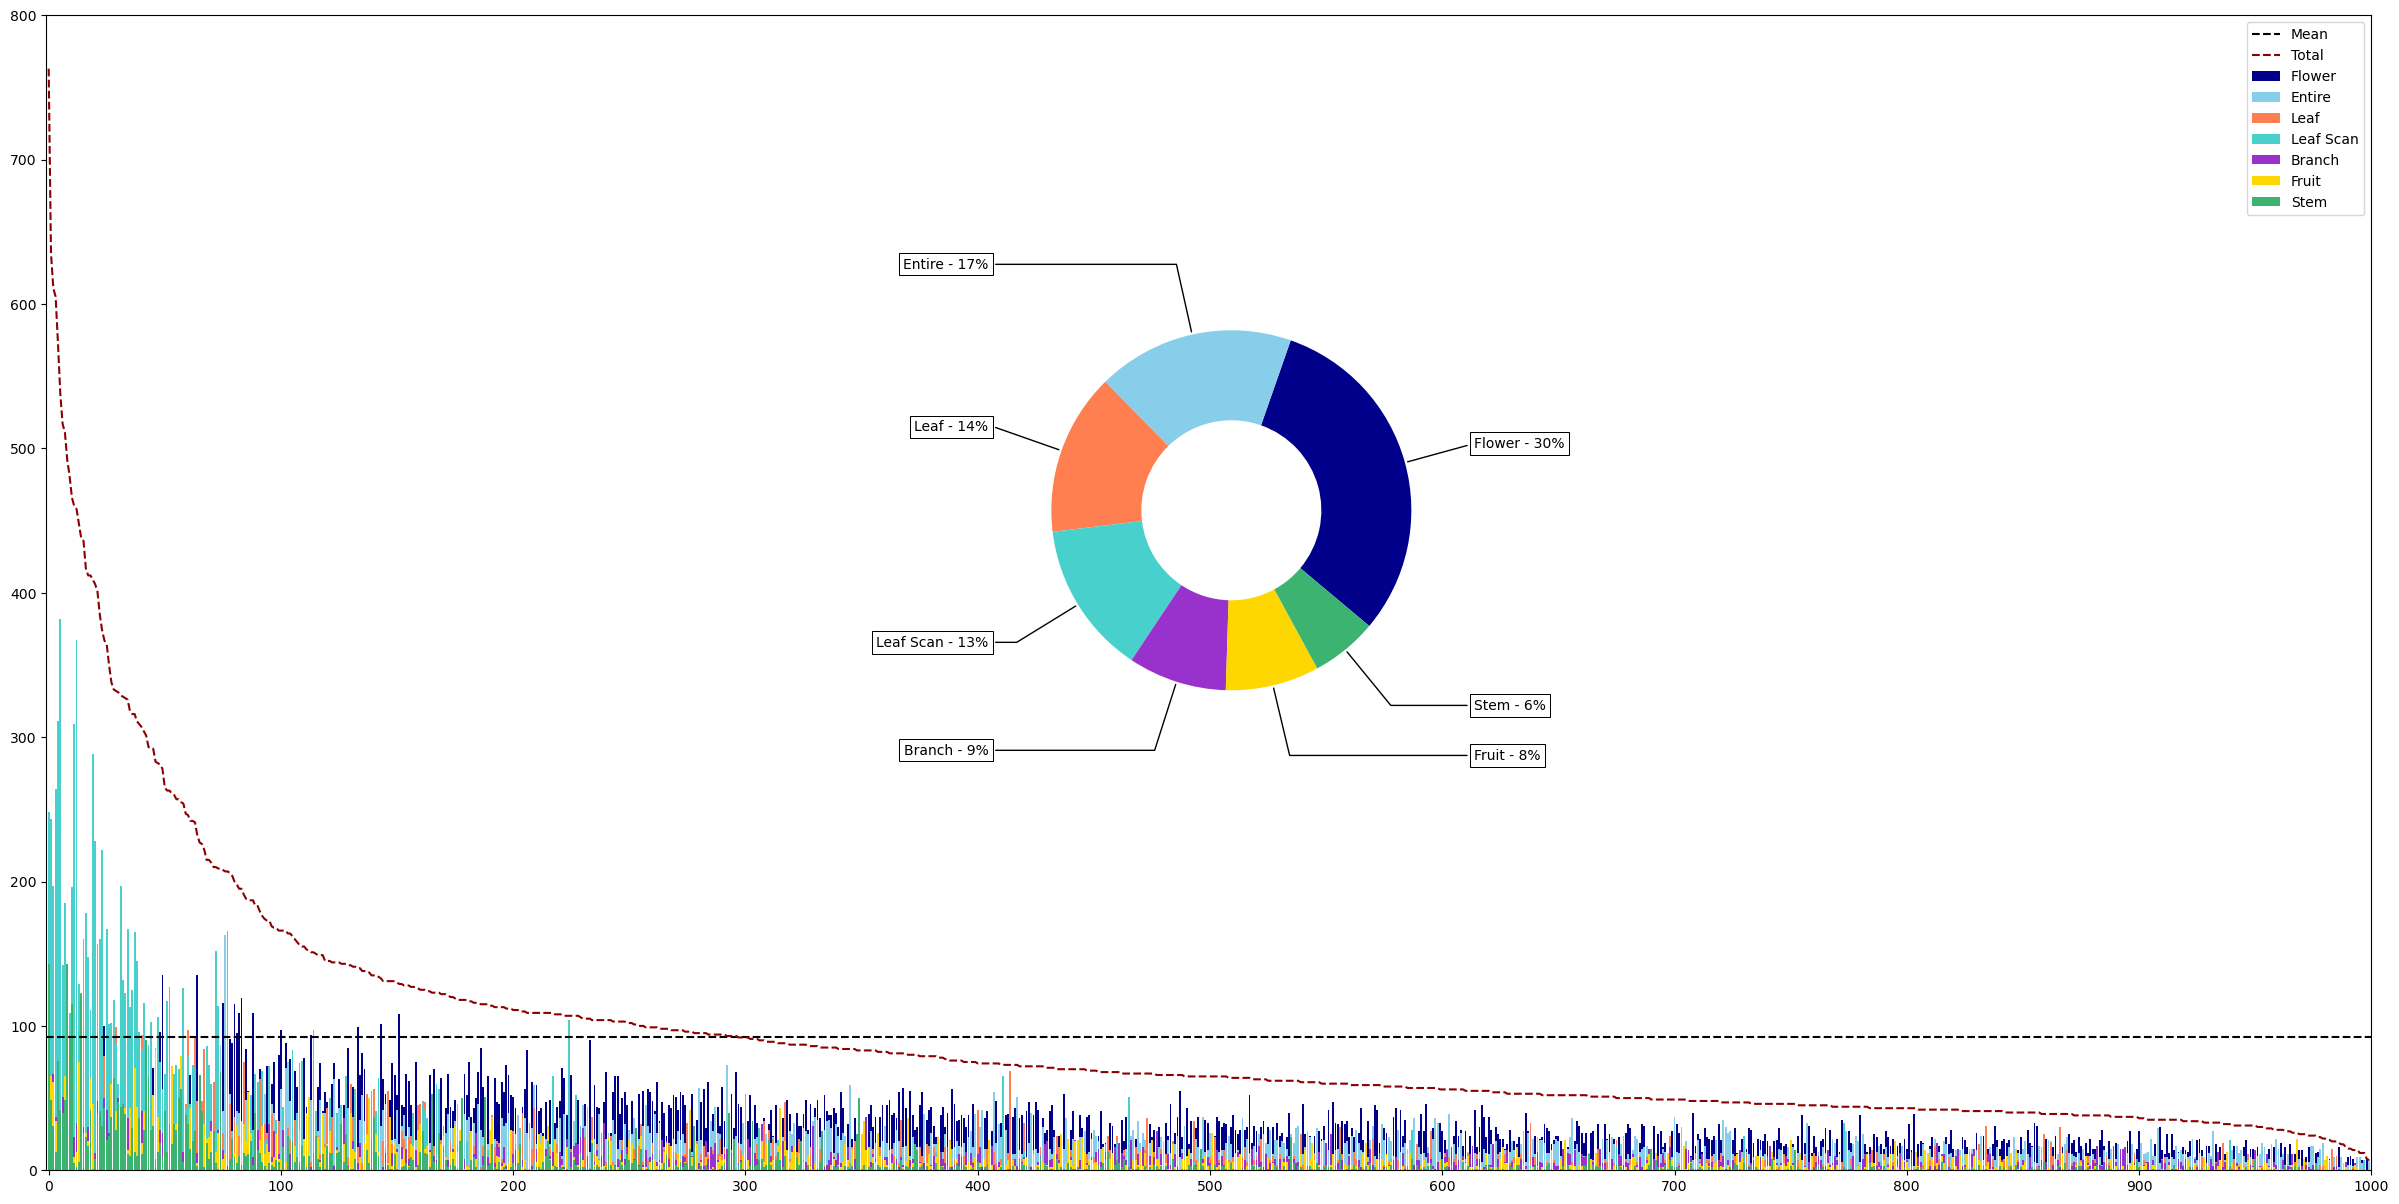

In [303]:
plt.style.use('default') 
fig, ax = plt.subplots(figsize=(30,15))

ax.bar(range(1000),flower_sorted_data, color = ['darkblue'],label='Flower')
#plt.xticks(np.arange(0, 1001, 250))

ax.bar(range(1000),entire_sorted_data,color=['skyblue'],label='Entire')
#plt.xticks(np.arange(0, 1001, 250))

ax.bar(range(1000),leaf_sorted_data,color=['coral'],label='Leaf')
#plt.xticks(np.arange(0, 1001, 250))

ax.bar(range(1000),leafScan_sorted_data,color=['mediumturquoise'],label='Leaf Scan')
#plt.xticks(np.arange(0, 1001, 250))

ax.bar(range(1000),branch_sorted_data,color=['darkorchid'],label='Branch')
#plt.xticks(np.arange(0, 1001, 250))    

ax.bar(range(1000),fruit_sorted_data,color=['gold'],label='Fruit')
#plt.xticks(np.arange(0, 1001, 250))

ax.bar(range(1000),stem_sorted_data,color=['mediumseagreen'],label='Stem')
#plt.xticks(np.arange(0, 1001, 250))
ax.axhline(y=92,color='black',linestyle='--',label='Mean')

ax.plot(range(1000),yaxis, color='darkred',linestyle='--',label='Total')
#plt.yticks(np.arange(0, 401, 50))    
plt.xticks(np.arange(0, 1001, 100))
plt.axis([-1, 1000, 0, 800])

types = ["Flower - 30%",
        "Entire - 17%",
        "Leaf - 14%",
        "Leaf Scan - 13%",
        "Branch - 9%",
        "Fruit - 8%",
        "Stem - 6%"]

data = [28225, 16235, 13367, 12605, 8130, 7720, 5476]
left, bottom, width, height = [0.27, 0.4, 0.5, 0.3]
ax2 = fig.add_axes([left, bottom, width, height])
colors=['darkblue','skyblue','coral','mediumturquoise','darkorchid','gold','mediumseagreen']
wedges, texts = ax2.pie(data, wedgeprops=dict(width=0.5), startangle=-40,colors=colors)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax2.annotate(types[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)
ax.legend()
plt.savefig('dist.jpg')

In [61]:
mean = 0
class_dist = []
for i in range(len(species_bins)):
    species = species_dic[i]
    mean = mean + len(species_bins[species])
print(mean / 1000)

91.758


In [139]:
# Gera a distibuição de Imagens por Gênero (em ordem decrescente).
genera_distribution = []
for i in range(len(genera_dic)):
    genus = genera_dic[i]
    genera_distribution.append((i,len(genus_bins[genus])))

genera_distribution.sort(key=takeSecond, reverse=True)

sorted_genera_dic = [] # Dicionário com nome dos Gêneros, ordenado por quantidade de imagens.
for i in range(len(genera_distribution)):
    sorted_genera_dic.append(genera_dic[genera_distribution[i][0]])
print(sorted_genera_dic[0])
sorted_genera_dist = [] # Número de imagens correspondente ao dicionário acima.
for i in range(len(genera_distribution)):
    sorted_genera_dist.append(genera_distribution[i][1])
print(sorted_genera_dist[0])

Quercus
2174


In [202]:
# Computar quantidade de espécies por gênero.
# Para cada imagem Associar gênero e espécie. Então verificar cada quantidade.
# Ordenar por quantidade de espécie.
species_by_genus = {}
for i in range(len(genera_dic)):
    genus = genera_dic[i]
    species_by_genus[genus]= []

for i in range(len(species_dic)):
    species = species_dic[i]
    genus = species.split(' ')[0]
    species_by_genus[genus].append(species)

descending_species_by_genus = []
for i in range(len(genera_dic)):
    genus = genera_dic[i]
    descending_species_by_genus.append((i,len(species_by_genus[genus])))
descending_species_by_genus.sort(key=takeSecond,reverse=True)

# Filtra os gêneros com mais de 2 espécies (para visualização).
descending_species_by_genus_subset = []
for i in range(len(descending_species_by_genus)):
    if descending_species_by_genus[i][1] > 2:
        descending_species_by_genus_subset.append(descending_species_by_genus[i])
print(len(descending_species_by_genus_subset))
genus_x_axis_labels = []
for i in range(len(descending_species_by_genus_subset)):
    genus_name_index = descending_species_by_genus_subset[i][0]
    genus_x_axis_labels.append(genera_dic[genus_name_index])

descending_species_by_genus_data = []
for i in range(len(descending_species_by_genus_subset)):
    descending_species_by_genus_data.append(descending_species_by_genus_subset[i][1])

raxis_data = []
for i in range(len(descending_species_by_genus_subset)):
    genus_index = descending_species_by_genus_subset[i][0]
    genus = genera_dic[genus_index]
    raxis_data.append(len(genus_bins[genus]))

100


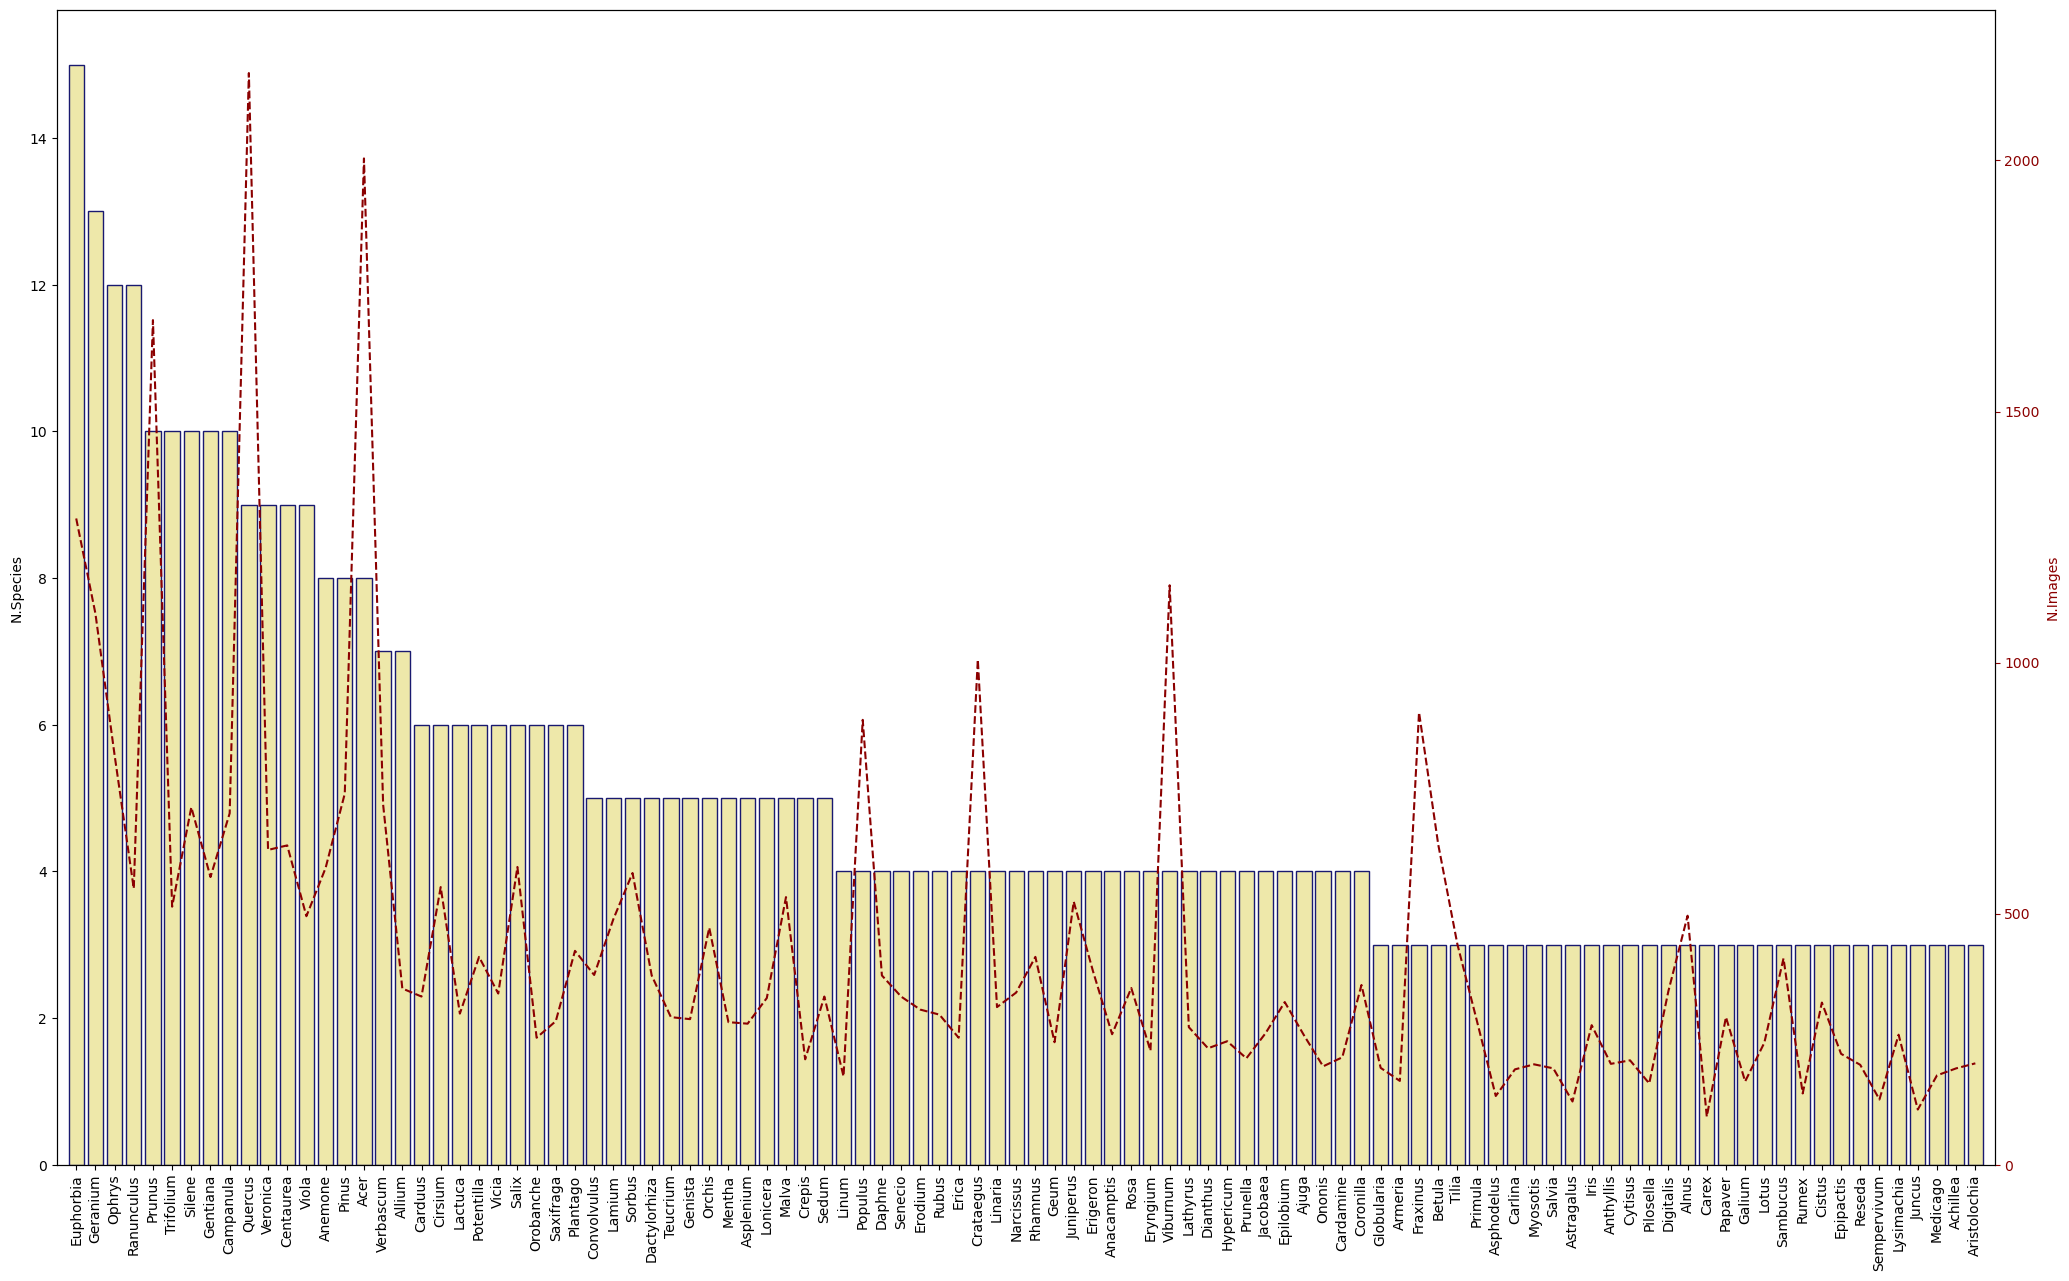

In [248]:
plt.style.use('default') 
fig, ax = plt.subplots(figsize=(25,15))
#ax.plot(range(516), sorted_genera_dist,linestyle='--', color= 'darkblue')
ax.bar(genus_x_axis_labels, descending_species_by_genus_data,color=['palegoldenrod'],edgecolor=['midnightblue'])
plt.xticks(rotation=90)
plt.ylabel('N.Species')
ax2 = ax.twinx()
ax2.yaxis.set_label_position("right")
ax2.plot(genus_x_axis_labels,raxis_data, color='darkred',linestyle='--',label='Total')
ax2.tick_params(axis='y', colors='darkred')
plt.ylabel('N.Images', color='darkred')
plt.axis([-1,100,0,2300])
plt.show()
#plt.axis([0, 520, 0, 2500])
#plt.yticks(np.arange(0, 2500, 250))
#plt.xticks(np.arange(0, 1001, 250))


In [ ]:
genus_dictionary

In [267]:
# todo substituir em xxx
descending_species_by_family = []
for i in range(len(familiae_dic)):
    family = familiae_dic[i]
    descending_species_by_family.append((i,len(species_by_family_dic[family])))
descending_species_by_family.sort(key=takeSecond,reverse=True)
descending_species_by_family

In [295]:
# Computar quantidade de espécies por Família.
# Para cada imagem Associar Família e espécie. Então verificar cada quantidade.
# Ordenar por quantidade de espécie.

species_by_family_dic = {}
for reg in range(len(training_images)):
    species_by_family_dic[training_images.Family[reg]]={}
for reg in range(len(training_images)): # Todo: refazer, dicionário de familia para dicionário de lista de espécies (espécies duplicadas foram adicionadas)
    species_by_family_dic[training_images.Family[reg]][training_images.Species[reg]] = []
for reg in range(len(training_images)): # Todo: refazer, dicionário de familia para dicionário de lista de espécies (espécies duplicadas foram adicionadas)
    species_by_family_dic[training_images.Family[reg]][training_images.Species[reg]].append(training_images.Filename[reg])
species_by_family_distribution = []
for i in range(len(species_by_family_dic)):
    family = familiae_dic[i]
    species_by_family_distribution.append((i,len(species_by_family_dic[family])))
species_by_family_distribution.sort(key=takeSecond,reverse=True)

# Filtra as famílias com mais de 1 espécies (para visualização).
descending_species_by_family_subset = []
for i in range(len(species_by_family_distribution)):
    if species_by_family_distribution[i][1] > 1:
        descending_species_by_family_subset.append(species_by_family_distribution[i])
print(len(descending_species_by_family_subset))

family_x_axis_labels = []
for i in range(len(descending_species_by_family_subset)):
    family_name_index = descending_species_by_family_subset[i][0]
    family_x_axis_labels.append(familiae_dic[family_name_index])

descending_species_by_family_data = []
for i in range(len(descending_species_by_family_subset)):
    descending_species_by_family_data.append(descending_species_by_family_subset[i][1])

raxis_data = []
for i in range(len(descending_species_by_family_subset)):
    family_index = descending_species_by_family_subset[i][0]
    family = familiae_dic[family_index]
    raxis_data.append(len(family_bins[family]))

81


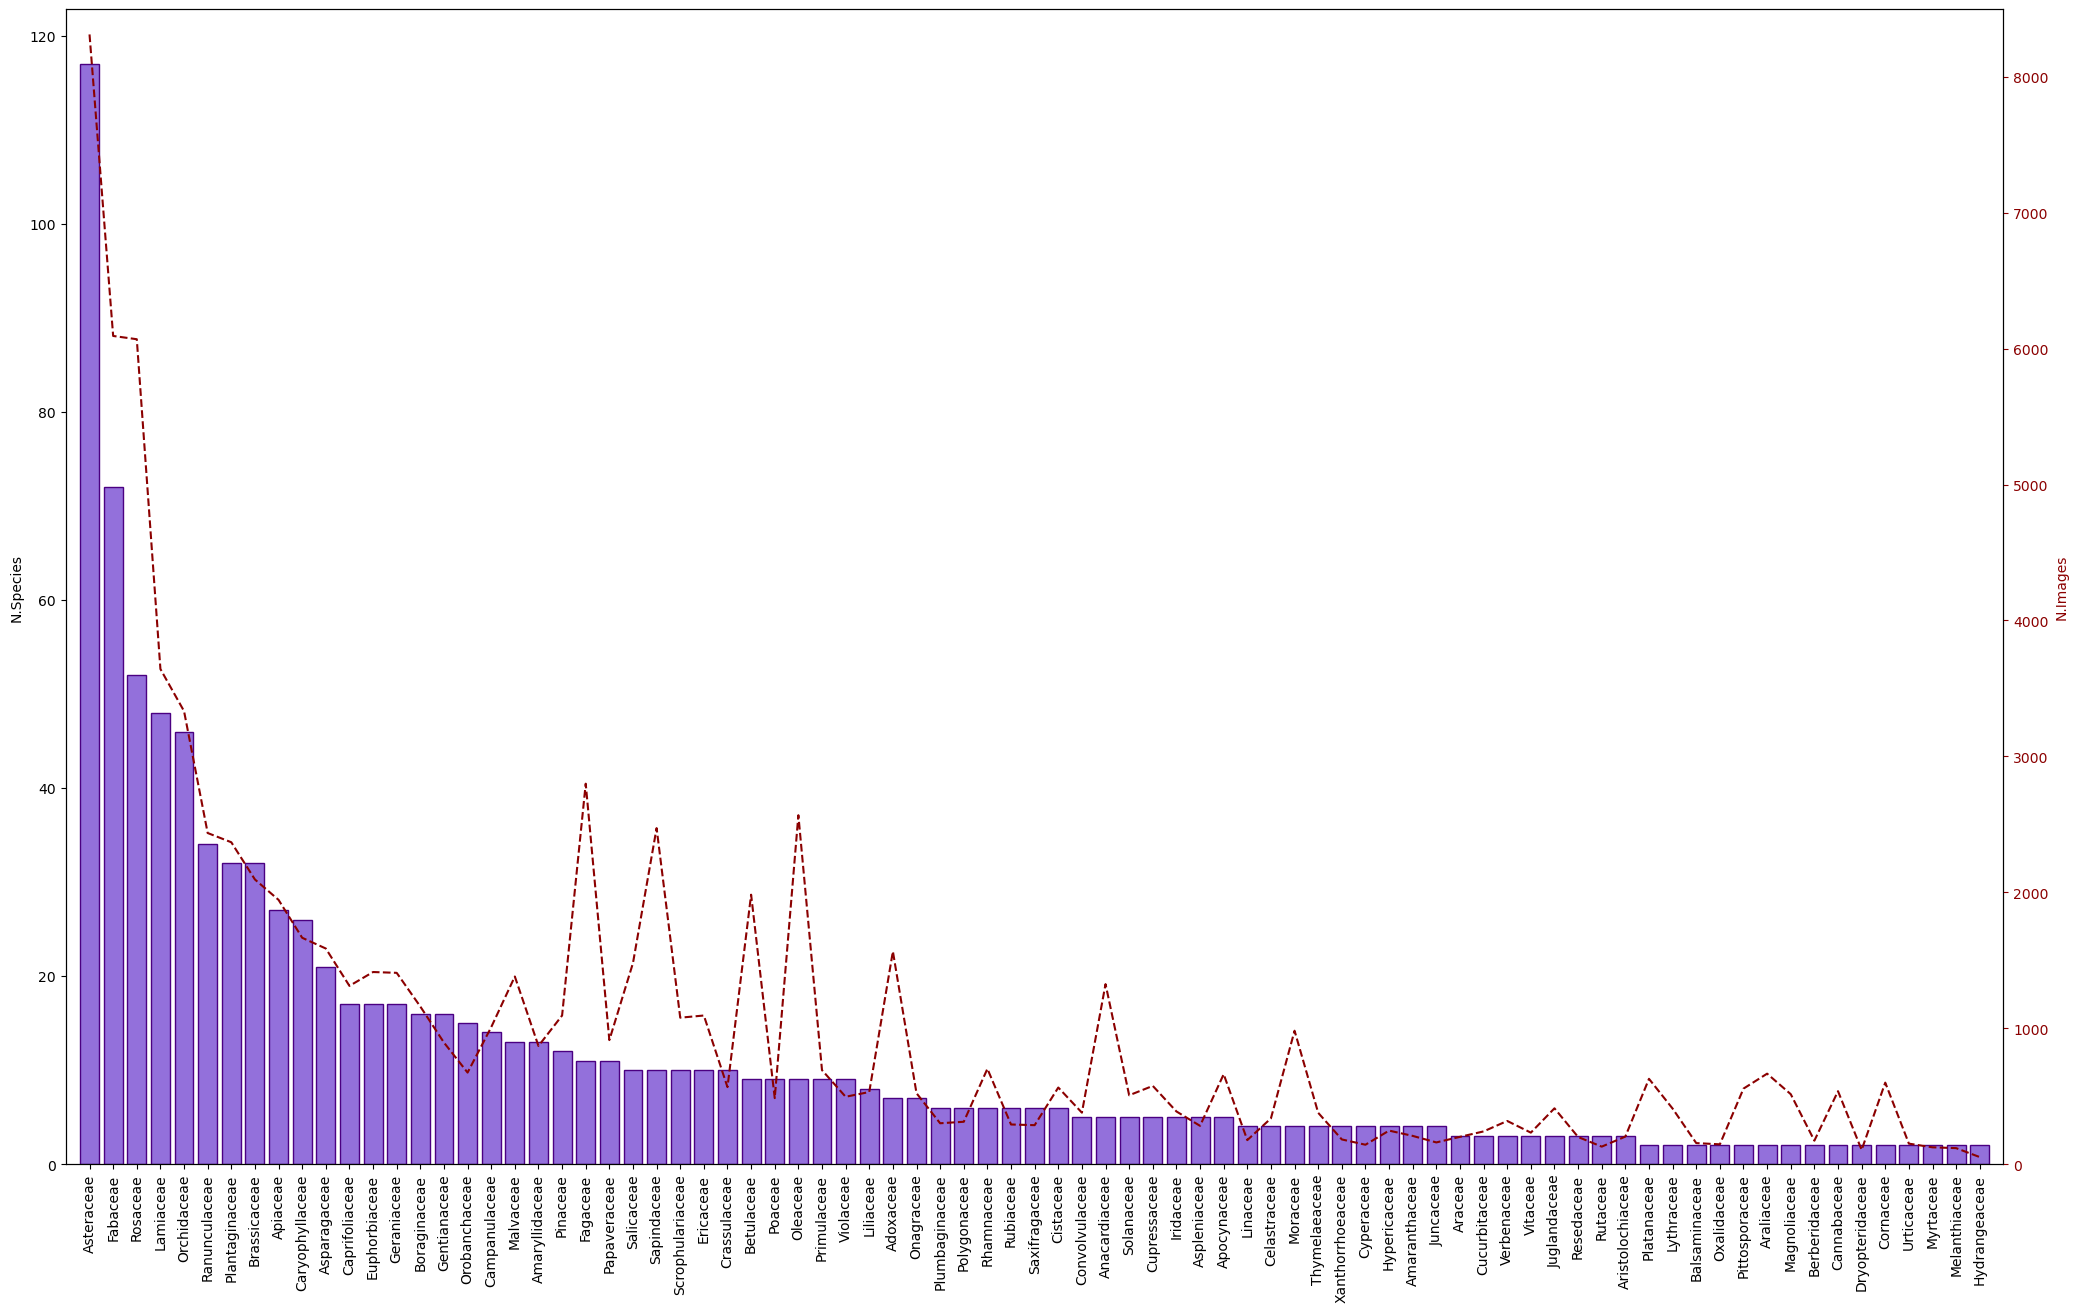

In [301]:
plt.style.use('default') 
fig, ax = plt.subplots(figsize=(25,15))
#ax.plot(range(516), sorted_genera_dist,linestyle='--', color= 'darkblue')
ax.bar(family_x_axis_labels, descending_species_by_family_data,color=['mediumpurple'],edgecolor=['indigo'])
plt.xticks(rotation=90)
plt.ylabel('N.Species')
ax2 = ax.twinx()
ax2.yaxis.set_label_position("right")
ax2.plot(family_x_axis_labels,raxis_data, color='darkred',linestyle='--',label='Total')
ax2.tick_params(axis='y', colors='darkred')
plt.ylabel('N.Images', color='darkred')
plt.axis([-1,81,0,8500])
plt.show()
#plt.axis([0, 520, 0, 2500])
#plt.yticks(np.arange(0, 2500, 250))
#plt.xticks(np.arange(0, 1001, 250))
# 81 gêneros de um total de 

In [300]:
print(len(species_bins))
print(len(genus_bins))
print(len(family_bins))

1000
516
124


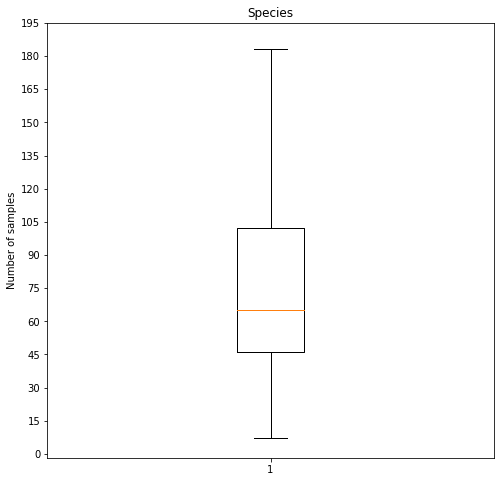

In [58]:
fig, ax = plt.subplots()
ax.boxplot(species_data_distribution, showfliers=False)
fig.set_size_inches(8,8)
plt.yticks(np.arange(0, 200, 15))
plt.ylabel('Number of samples')
plt.title('Species')
plt.savefig('analysis/species_distribution.jpg')
plt.show()

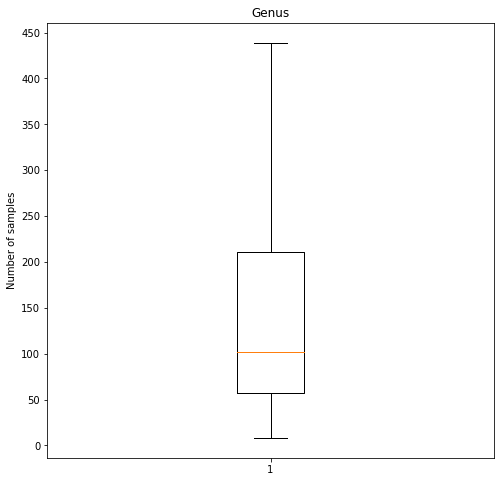

In [59]:
fig, ax = plt.subplots()
ax.boxplot(genera_data_distribution, showfliers=False)
fig.set_size_inches(8,8)
plt.yticks(np.arange(0, 500, 50))
plt.ylabel('Number of samples')
plt.title('Genus')
plt.savefig('analysis/genus_distribution.jpg')
plt.show()

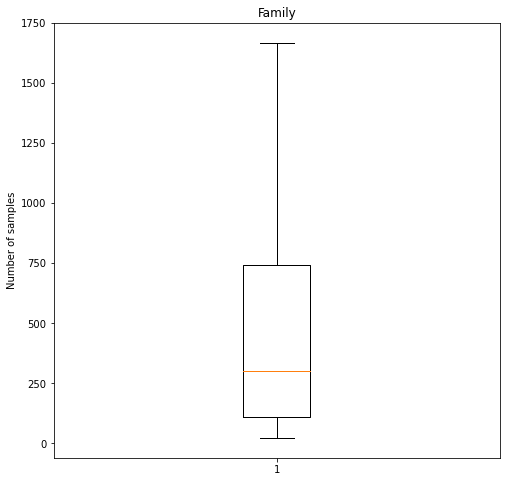

In [60]:
fig, ax = plt.subplots()
ax.boxplot(familiae_data_distribution, showfliers=False)
fig.set_size_inches(8,8)
plt.yticks(np.arange(0, 2000, 250))
plt.ylabel('Number of samples')
plt.title('Family')
plt.savefig('analysis/family_distribution.jpg')
plt.show()

In [62]:
print(max(species_data_distribution))
print(min(species_data_distribution))

print(max(genera_data_distribution))
print(min(genera_data_distribution))

print(max(familiae_data_distribution))
print(min(familiae_data_distribution))

763
7
2174
8
8313
22


(0.0, 864.0)

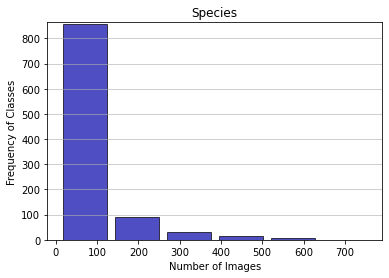

In [86]:
max_freq = max(species_data_distribution)
min_freq = min(species_data_distribution)
n, bins, patches = plt.hist(x=species_data_distribution, bins=6, color='#0504aa',
                            alpha=0.7, rwidth=0.85, edgecolor='black')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Number of Images')
plt.ylabel('Frequency of Classes')
plt.title('Species')
#plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 12) * 12 if maxfreq % 12 else maxfreq + 12)
#plt.xticks(np.arange(min_freq, max_freq, 63))

(0.0, 500.0)

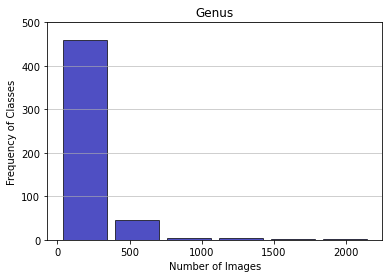

In [85]:
max_freq = max(genera_data_distribution)
min_freq = min(genera_data_distribution)
n, bins, patches = plt.hist(x=genera_data_distribution, bins=6, color='#0504aa',
                            alpha=0.7, rwidth=0.85, edgecolor='black')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Number of Images')
plt.ylabel('Frequency of Classes')
plt.title('Genus')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 50) * 50 if maxfreq % 50 else maxfreq + 50)
#plt.xticks(np.arange(min_freq, max_freq, 200))

(0.0, 120.0)

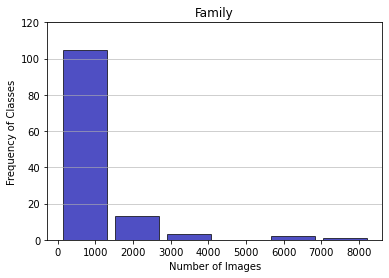

In [89]:
max_freq = max(familiae_data_distribution)
min_freq = min(familiae_data_distribution)
n, bins, patches = plt.hist(x=familiae_data_distribution, bins=6, color='#0504aa',
                            alpha=0.7, rwidth=0.85, edgecolor='black')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Number of Images')
plt.ylabel('Frequency of Classes')
plt.title('Family')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 30) * 30 if maxfreq % 30 else maxfreq + 30)
#plt.xticks(np.arange(min_freq, max_freq, 200))